# DidgeLab: Visualizing didgeridoos and impedance spectra

This notebook demonstrates the visualization tools in `didgelab.visualize`:
- Bore geometry from a `Geo` object
- Impedance spectrum computed and displayed for a geometry
- Tuning (notes) via `get_notes`
- All three side by side (one row, three columns)
- Multiple geometries at once (one row per geometry)

In [1]:
import sys
sys.path.insert(0, "..")

import matplotlib.pyplot as plt
from didgelab import (
    Geo,
    plot_bore,
    plot_impedance_spectrum,
    plot_notes,
    plot_geo_impedance_notes,
    vis_didge,
)

## 1. Bore geometry only

Plot the bore cross-section (position vs radius) for a single geometry.

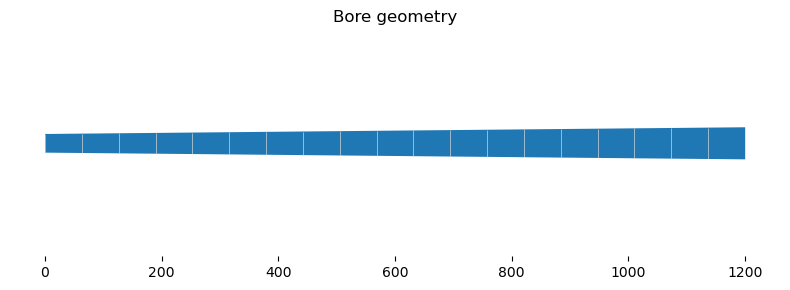

In [2]:
geo = Geo.make_cone(length=1200, d1=32, d2=55, n_segments=20)
plt.figure(figsize=(8, 3))
plot_bore(geo)
plt.tight_layout()
plt.show()

## 2. Impedance spectrum only

Compute and plot the impedance spectrum for a geometry (simulation over a log-spaced frequency grid).

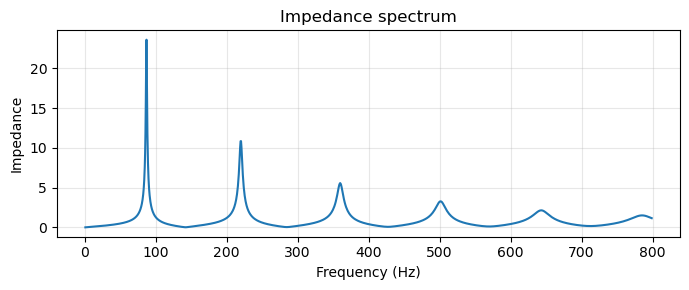

In [3]:
plt.figure(figsize=(7, 3))
ax, freqs, impedance = plot_impedance_spectrum(geo, fmin=1, fmax=800, max_error=5)
plt.tight_layout()
plt.show()

## 3. Tuning (notes) only

Compute impedance, detect peaks, and show the tuning as note names and cents.

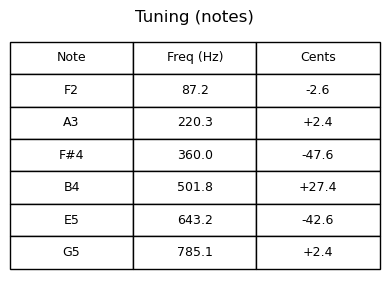

Notes DataFrame:
  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        F2      -2.63      -28   87.17      23.58     1.00
1        A3       2.37      -12  220.30      10.84     0.46
2       F#4     -47.63       -3  359.95       5.57     0.24
3        B4      27.37        2  501.75       3.28     0.14
4        E5     -42.63        7  643.22       2.15     0.09
5        G5       2.37       10  785.06       1.51     0.06


In [4]:
plt.figure(figsize=(4, 3))
ax, notes_df = plot_notes(geo, base_freq=440, fmin=1, fmax=800, max_error=5)
plt.tight_layout()
plt.show()
print("Notes DataFrame:")
print(notes_df.round(2))

## 4. All three side by side (one geometry)

One row, three columns: bore | impedance spectrum | notes.

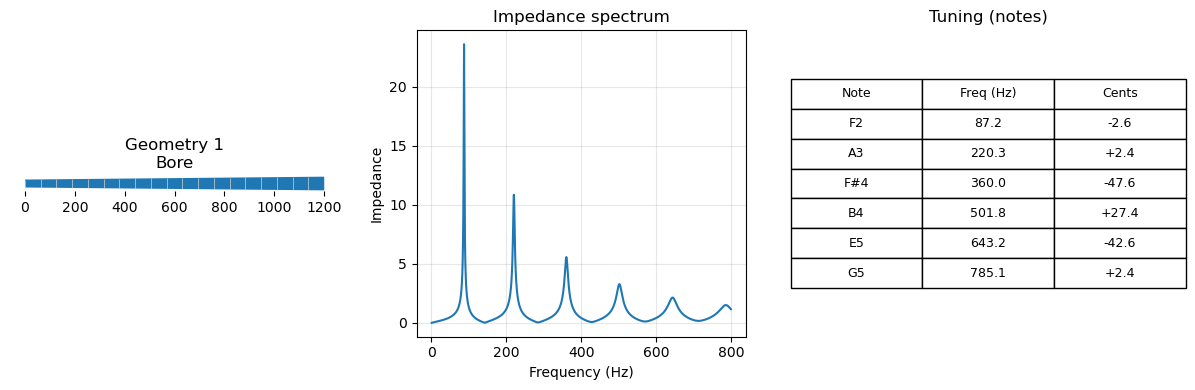

In [5]:
fig, axes = plot_geo_impedance_notes(
    geo,
    fmin=1,
    fmax=800,
    max_error=5,
    base_freq=440,
    figsize=(12, 4),
)
plt.show()

## 5. Multiple geometries at once

Pass a list of geometries; each gets one row with three columns (bore, impedance, notes).

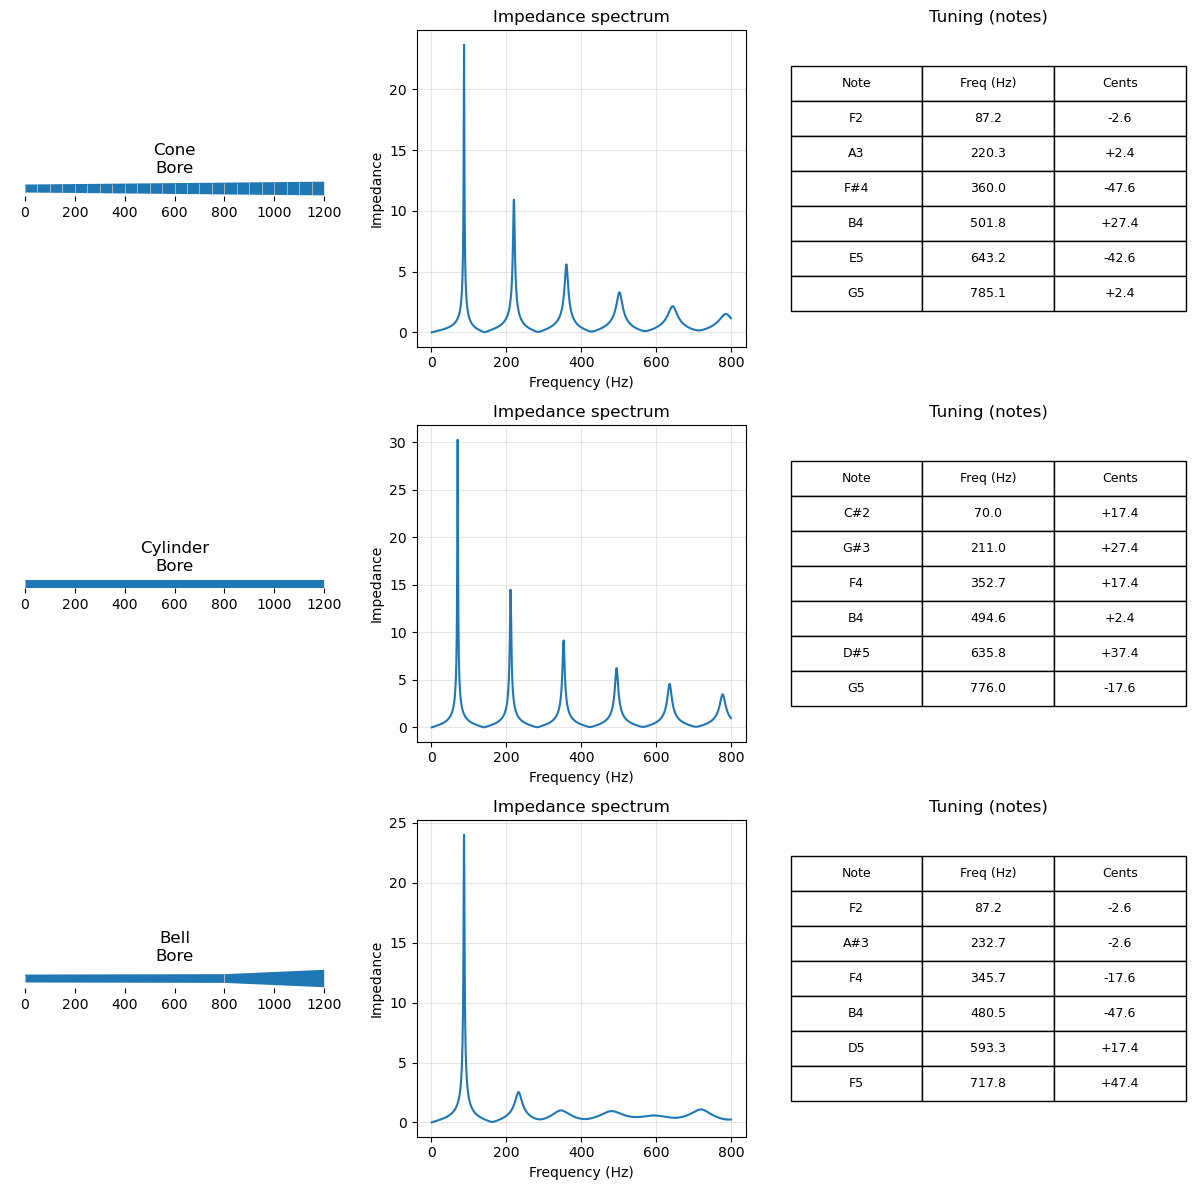

In [6]:
geo_cone = Geo.make_cone(length=1200, d1=32, d2=55, n_segments=25)
geo_cyl = Geo(geo=[[0, 32], [1200, 32]])
geo_bell = Geo(geo=[[0, 32], [800, 35], [1200, 70]])

fig, axes = plot_geo_impedance_notes(
    [geo_cone, geo_cyl, geo_bell],
    fmin=1,
    fmax=800,
    max_error=5,
    base_freq=440,
    titles=["Cone", "Cylinder", "Bell"],
)
plt.show()